In [ ]:
import os
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

# 1. Load Text Files
def load_text_files(folder_path):
    file_data = []
    file_names = []
    for file_name in os.listdir(folder_path):
        if file_name.endswith('.txt'):
            with open(os.path.join(folder_path, file_name), 'r', encoding='utf-8') as file:
                content = file.read().strip()
                if content:  # Exclude empty files
                    file_data.append(content)
                    file_names.append(file_name)
    return file_data, file_names

# 2. TF-IDF Vectorization and Cosine Similarity
def compute_similarity(documents, file_names):
    # Apply TF-IDF Vectorizer
    vectorizer = TfidfVectorizer()
    tfidf_matrix = vectorizer.fit_transform(documents)

    # Compute cosine similarity matrix
    similarity_matrix = cosine_similarity(tfidf_matrix)

    # Convert to DataFrame
    similarity_df = pd.DataFrame(similarity_matrix, index=file_names, columns=file_names)
    return similarity_df

# 3. Main Functionality
folder_path = r"H:\Text Mining\Tel_text\Tel_text" 
documents, file_names = load_text_files(folder_path)

if not documents:
    raise ValueError("No valid documents found. Ensure your folder contains non-empty .txt files.")

# Compute similarity
similarity_df = compute_similarity(documents, file_names)

# 4. Save Results
output_file = "theses_similarity.csv"
similarity_df.to_csv(output_file)
print(f"Similarity matrix saved as '{output_file}'")


Similarity matrix saved as 'theses_similarity.csv'


     ---------------------------------------- 1.7/1.7 MB 2.0 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\Programs Files\Python\Python310\python.exe -m pip install --upgrade pip' command.


Similarity matrix saved as 'theses_similarity.csv'


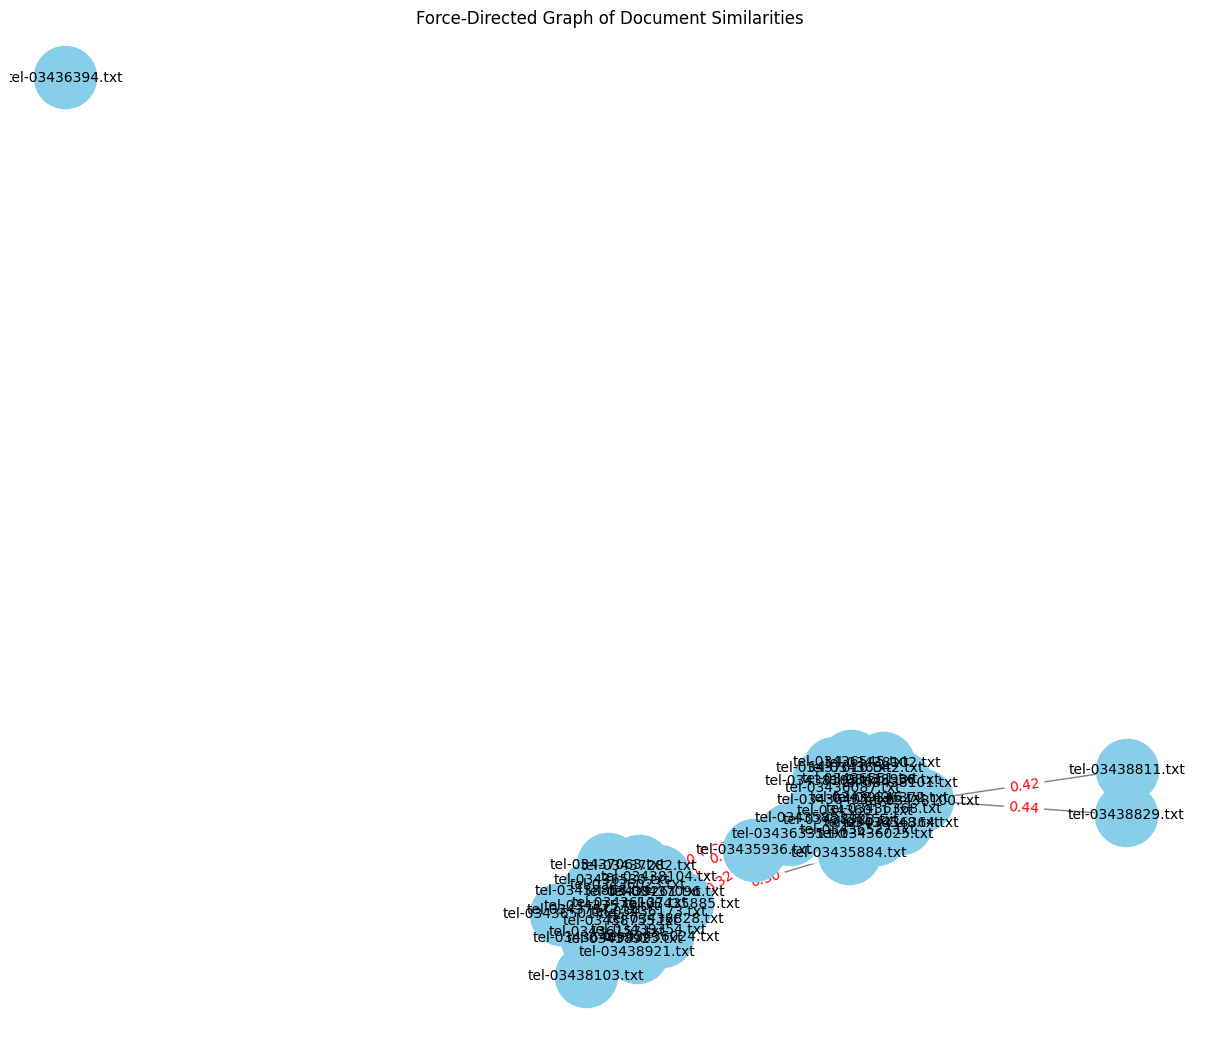

In [33]:
import os
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

# 1. Load Text Files
def load_text_files(folder_path):
    file_data = []
    file_names = []
    for file_name in os.listdir(folder_path):
        if file_name.endswith('.txt'):
            with open(os.path.join(folder_path, file_name), 'r', encoding='utf-8') as file:
                content = file.read().strip()
                if content:  # Exclude empty files
                    file_data.append(content)
                    file_names.append(file_name)
    return file_data, file_names

# 2. TF-IDF Vectorization and Cosine Similarity
def compute_similarity(documents, file_names):
    # Apply TF-IDF Vectorizer
    vectorizer = TfidfVectorizer()
    tfidf_matrix = vectorizer.fit_transform(documents)

    # Compute cosine similarity matrix
    similarity_matrix = cosine_similarity(tfidf_matrix)

    # Convert to DataFrame
    similarity_df = pd.DataFrame(similarity_matrix, index=file_names, columns=file_names)
    return similarity_df

# 3. Create Force-Directed Graph
def create_force_directed_graph(similarity_df, threshold=0.2):
    # Create an empty graph
    G = nx.Graph()

    # Add nodes for each document
    for node in similarity_df.index:
        G.add_node(node)

    # Add edges for document pairs with similarity above the threshold
    for i, row in similarity_df.iterrows():
        for j, similarity in row.items():
            if i != j and similarity >= threshold:  # Avoid self-loops
                G.add_edge(i, j, weight=similarity)

    return G

# 4. Visualize the Graph
def visualize_graph(G):
    # Generate positions for the nodes using a spring layout
    pos = nx.spring_layout(G, seed=42)

    # Draw the graph
    plt.figure(figsize=(12, 10))
    nx.draw(
        G, pos,
        with_labels=True,
        node_color="skyblue",
        edge_color="gray",
        node_size=2000,
        font_size=10
    )

    # Add edge labels showing the weights (cosine similarity)
    edge_labels = nx.get_edge_attributes(G, 'weight')
    nx.draw_networkx_edge_labels(
        G, pos,
        edge_labels={k: f"{v:.2f}" for k, v in edge_labels.items()},
        font_color='red'
    )

    plt.title("Force-Directed Graph of Document Similarities")
    plt.show()

# 5. Main Functionality
folder_path = r"H:\Text Mining\Tel_text\Tel_text"  # Replace with your folder path
documents, file_names = load_text_files(folder_path)

if not documents:
    raise ValueError("No valid documents found. Ensure your folder contains non-empty .txt files.")

# Compute similarity matrix
similarity_df = compute_similarity(documents, file_names)

# Save similarity matrix to CSV
output_file = "theses_similarity.csv"
similarity_df.to_csv(output_file)
print(f"Similarity matrix saved as '{output_file}'")

# Create a force-directed graph
threshold = 0.3  # Set a threshold for similarity to filter edges
G = create_force_directed_graph(similarity_df, threshold=threshold)

# Visualize the graph
visualize_graph(G)


In [24]:
import os
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

# 1. Load Text Files
def load_text_files(folder_path):
    file_data = []
    file_names = []
    for file_name in os.listdir(folder_path):
        if file_name.endswith('.txt'):
            with open(os.path.join(folder_path, file_name), 'r', encoding='utf-8') as file:
                content = file.read().strip()
                if content:  # Exclude empty files
                    file_data.append(content)
                    file_names.append(file_name)
    return file_data, file_names

# 2. TF-IDF Vectorization with n-grams
def compute_similarity_with_ngrams(documents, file_names, ngram_range=(1, 1)):
    # Apply TF-IDF Vectorizer with n-gram range
    vectorizer = TfidfVectorizer(ngram_range=ngram_range, stop_words='english')
    tfidf_matrix = vectorizer.fit_transform(documents)

    # Compute cosine similarity matrix
    similarity_matrix = cosine_similarity(tfidf_matrix)

    # Convert to DataFrame
    similarity_df = pd.DataFrame(similarity_matrix, index=file_names, columns=file_names)
    return similarity_df

# 3. Main Functionality
folder_path = r"H:\Text Mining\Tel_text\Tel_text"  # Replace with your folder path
documents, file_names = load_text_files(folder_path)

if not documents:
    raise ValueError("No valid documents found. Ensure your folder contains non-empty .txt files.")

# Compute similarity for bigrams
print("Computing similarity using bigrams...")
bigram_similarity_df = compute_similarity_with_ngrams(documents, file_names, ngram_range=(2, 2))
bigram_output_file = "bigram_similarity.csv"
bigram_similarity_df.to_csv(bigram_output_file)
print(f"Bigram similarity matrix saved as '{bigram_output_file}'")

# Compute similarity for trigrams
print("Computing similarity using trigrams...")
trigram_similarity_df = compute_similarity_with_ngrams(documents, file_names, ngram_range=(3, 3))
trigram_output_file = "trigram_similarity.csv"
trigram_similarity_df.to_csv(trigram_output_file)
print(f"Trigram similarity matrix saved as '{trigram_output_file}'")


Computing similarity using bigrams...
Bigram similarity matrix saved as 'bigram_similarity.csv'
Computing similarity using trigrams...
Trigram similarity matrix saved as 'trigram_similarity.csv'


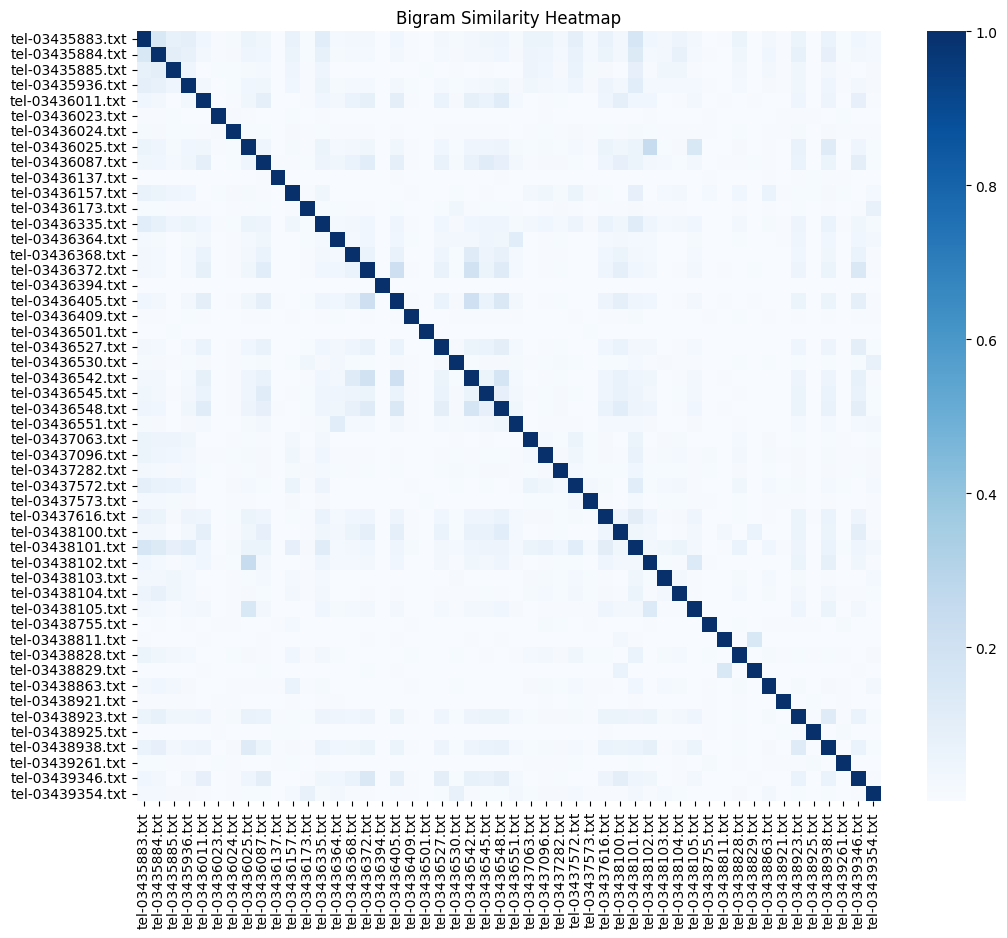

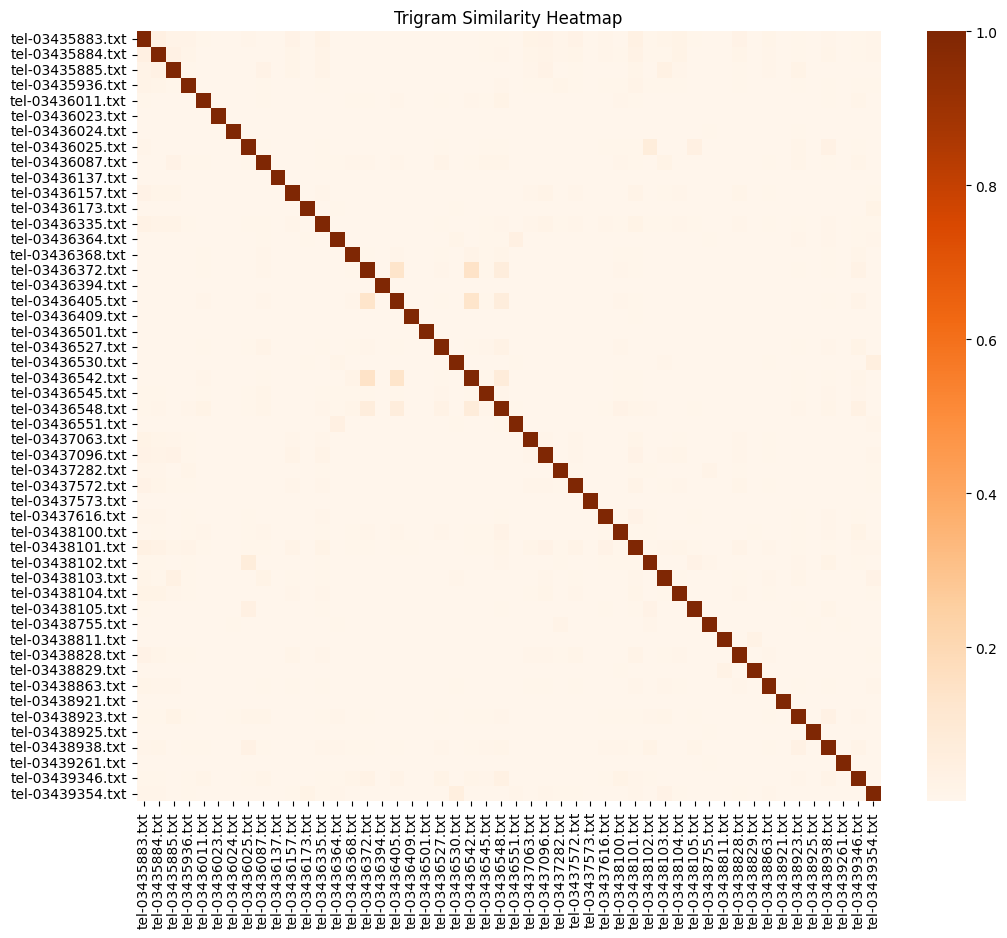

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt

# Heatmap for bigrams
plt.figure(figsize=(12, 10))
sns.heatmap(bigram_similarity_df, cmap="Blues", annot=False)
plt.title("Bigram Similarity Heatmap")
plt.show()

# Heatmap for trigrams
plt.figure(figsize=(12, 10))
sns.heatmap(trigram_similarity_df, cmap="Oranges", annot=False)
plt.title("Trigram Similarity Heatmap")
plt.show()


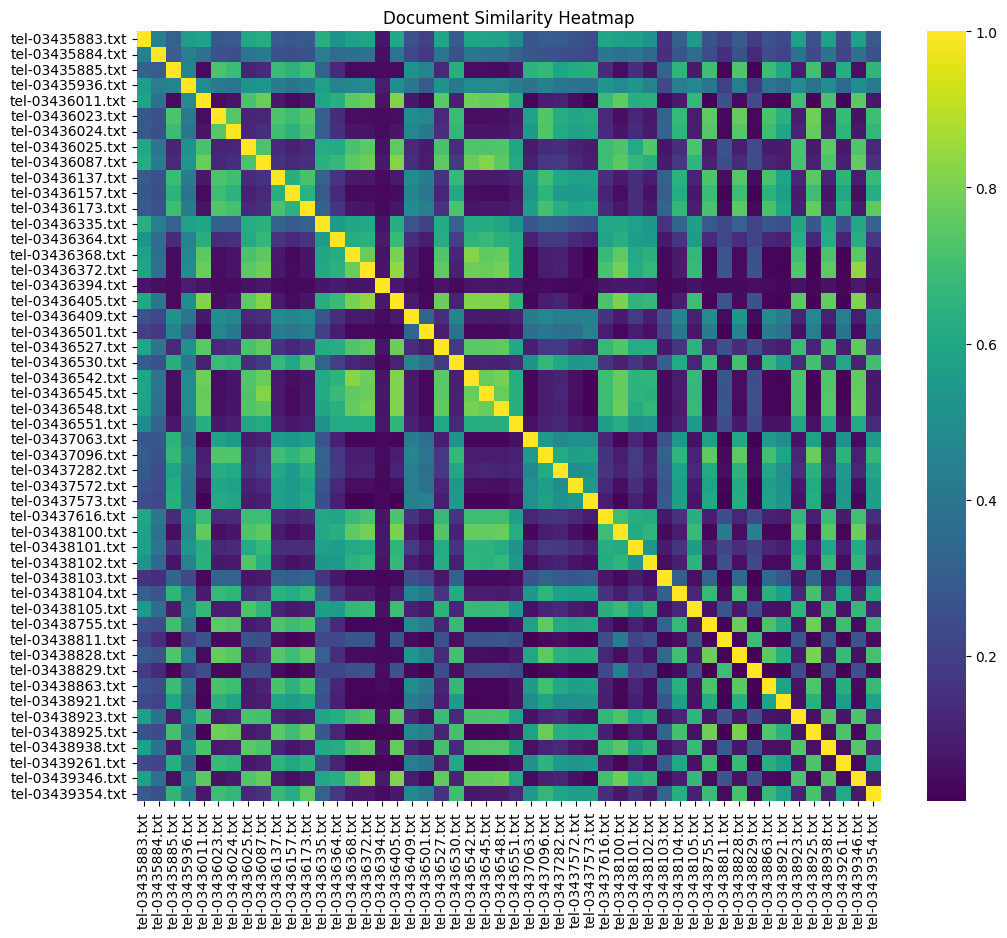

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 10))
sns.heatmap(similarity_df, annot=False, cmap="viridis")
plt.title("Document Similarity Heatmap")
plt.show()


In [21]:

import os
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.stem.porter import PorterStemmer

# Optional: Stemming tokenizer
stemmer = PorterStemmer()

def stemming_tokenizer(text):
    return [stemmer.stem(word) for word in text.split()]

# 1. Load Text Files
def load_text_files(folder_path):
    file_data = []
    file_names = []
    for file_name in os.listdir(folder_path):
        if file_name.endswith('.txt'):
            with open(os.path.join(folder_path, file_name), 'r', encoding='utf-8') as file:
                content = file.read().strip()
                if content:  # Exclude empty files
                    file_data.append(content)
                    file_names.append(file_name)
    return file_data, file_names

# 2. TF-IDF Vectorization
def compute_tfidf(documents, use_stemming=False):
    # Initialize the vectorizer
    vectorizer = TfidfVectorizer(
        stop_words='english',
        tokenizer=stemming_tokenizer if use_stemming else None
    )
    # Fit and transform the documents
    tfidf_matrix = vectorizer.fit_transform(documents)
    # Create a DataFrame
    terms = vectorizer.get_feature_names_out()
    tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=terms)
    return tfidf_df

# 3. Main Functionality
folder_path = r"H:\Text Mining\Tel_text\Tel_text"  
documents, file_names = load_text_files(folder_path)

if not documents:
    raise ValueError("No valid documents found. Ensure your folder contains non-empty .txt files.")

# Compute TF-IDF with stemming
use_stemming = True  # Set to True if you want stemming applied
tfidf_df = compute_tfidf(documents, use_stemming=use_stemming)

# Add filenames as a column for clarity
tfidf_df.insert(0, "File", file_names)

# Display or Save Results
print(tfidf_df)
output_file = "tfidf_table.csv"
tfidf_df.to_csv(output_file, index=False)
print(f"TF-IDF table saved as '{output_file}'")


c:\Programs Files\Python\Python310\lib\site-packages\sklearn\feature_extraction\text.py:521: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
c:\Programs Files\Python\Python310\lib\site-packages\sklearn\feature_extraction\text.py:406: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['abov', 'afterward', 'alon', 'alreadi', 'alway', 'ani', 'anoth', 'anyon', 'anyth', 'anywher', 'becam', 'becaus', 'becom', 'befor', 'besid', 'cri', 'describ', 'dure', 'els', 'elsewher', 'empti', 'everi', 'everyon', 'everyth', 'everywher', 'fifti', 'formerli', 'forti', 'ha', 'henc', 'hereaft', 'herebi', 'hi', 'howev', 'hundr', 'inde', 'latterli', 'mani', 'meanwhil', 'moreov', 'mostli', 'nobodi', 'noon', 'noth', 'nowher', 'onc', 'onli', 'otherwis', 'ourselv', 'perhap', 'pleas', 'seriou', 'sever', 'sinc', 'sincer', 'sixti', 'someon', 'someth', 'sometim', 'somewher', 'themselv', 'thenc'

                File                         \
0   tel-03435883.txt  0.000000  0.000000    0.000000  0.000000      0.000000   
1   tel-03435884.txt  0.000000  0.000000    0.000000  0.000000      0.000000   
2   tel-03435885.txt  0.000591  0.000000    0.000000  0.000000      0.000000   
3   tel-03435936.txt  0.000000  0.000000    0.000000  0.000000      0.000000   
4   tel-03436011.txt  0.000000  0.000000    0.000000  0.000000      0.000000   
5   tel-03436023.txt  0.000000  0.000000    0.000000  0.000000      0.000000   
6   tel-03436024.txt  0.007517  0.000000    0.000000  0.000000      0.000000   
7   tel-03436025.txt  0.000000  0.000000    0.000000  0.000000      0.000000   
8   tel-03436087.txt  0.000000  0.000000    0.000000  0.000000      0.000000   
9   tel-03436137.txt  0.000506  0.000000    0.000847  0.000847      0.000847   
10  tel-03436157.txt  0.000460  0.000000    0.000000  0.000000      0.000000   
11  tel-03436173.txt  0.000806  0.000000    

In [22]:
from IPython.display import display

# Display with limited rows and columns for better readability
display(tfidf_df.head(10))  # Show top 10 rows


,File,,,,,,,,1,1−σ,...,𝜖̅,𝜙,𝜙/𝜙,𝜭ab,𝝈,𝝍,𝝓,𝟏,𝟏.,𝟐.
0,tel-03435883.txt,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
1,tel-03435884.txt,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
2,tel-03435885.txt,0.000591,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
3,tel-03435936.txt,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
4,tel-03436011.txt,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
5,tel-03436023.txt,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
6,tel-03436024.txt,0.007517,0.0,0.000000,0.000000,0.000000,0.000898,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.000898,0.0,0.0,0.0,0.0,0.0,0.0
7,tel-03436025.txt,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
8,tel-03436087.txt,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
9,tel-03436137.txt,0.000506,0.0,0.000847,0.000847,0.000847,0.000000,0.000847,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0


In [43]:
import os
import pandas as pd
import nltk
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from nltk.corpus import stopwords
from nltk.tokenize import regexp_tokenize
from nltk.stem import SnowballStemmer

# Ensure necessary NLTK resources are downloaded
nltk.download('stopwords')

# 1. Load Text Files
def load_text_files(folder_path):
    file_data = []
    file_names = []
    for file_name in os.listdir(folder_path):
        if file_name.endswith('.txt'):
            with open(os.path.join(folder_path, file_name), 'r', encoding='utf-8') as file:
                content = file.read().strip()
                if content:  # Exclude empty files
                    file_data.append(content)
                    file_names.append(file_name)
    return file_data, file_names

# 2. Preprocess Text using NLTK
def preprocess_text(documents):
    # French stopwords
    stop_words = set(stopwords.words('french'))
    stemmer = SnowballStemmer('french')
    
    processed_docs = []
    for doc in documents:
        # Tokenize the text using a regex tokenizer for French
        tokens = regexp_tokenize(doc, pattern=r'\s|[\.,;?!\(\)"]', gaps=True)
        # Remove stopwords and stem
        filtered_tokens = [stemmer.stem(word) for word in tokens if word.lower() not in stop_words and word.isalpha()]
        processed_docs.append(" ".join(filtered_tokens))
    
    return processed_docs

# 3. TF-IDF Vectorization and Cosine Similarity
def compute_similarity(documents, file_names):
    # Apply TF-IDF Vectorizer
    vectorizer = TfidfVectorizer()
    tfidf_matrix = vectorizer.fit_transform(documents)

    # Compute cosine similarity matrix
    similarity_matrix = cosine_similarity(tfidf_matrix)

    # Convert to DataFrame
    similarity_df = pd.DataFrame(similarity_matrix, index=file_names, columns=file_names)
    return similarity_df

# 4. Main Functionality
folder_path = r"H:\Text Mining\Tel_text\Tel_text" 
documents, file_names = load_text_files(folder_path)

if not documents:
    raise ValueError("No valid documents found. Ensure your folder contains non-empty .txt files.")

# Preprocess the documents using NLTK
processed_documents = preprocess_text(documents)

# Compute similarity
similarity_df = compute_similarity(processed_documents, file_names)

# 5. Save Results
output_file = "theses_similarity.csv"
similarity_df.to_csv(output_file)
print(f"Similarity matrix saved as '{output_file}'")


[nltk_data] Downloading package stopwords to C:\Users\CYTech
[nltk_data]     Student\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Similarity matrix saved as 'theses_similarity.csv'


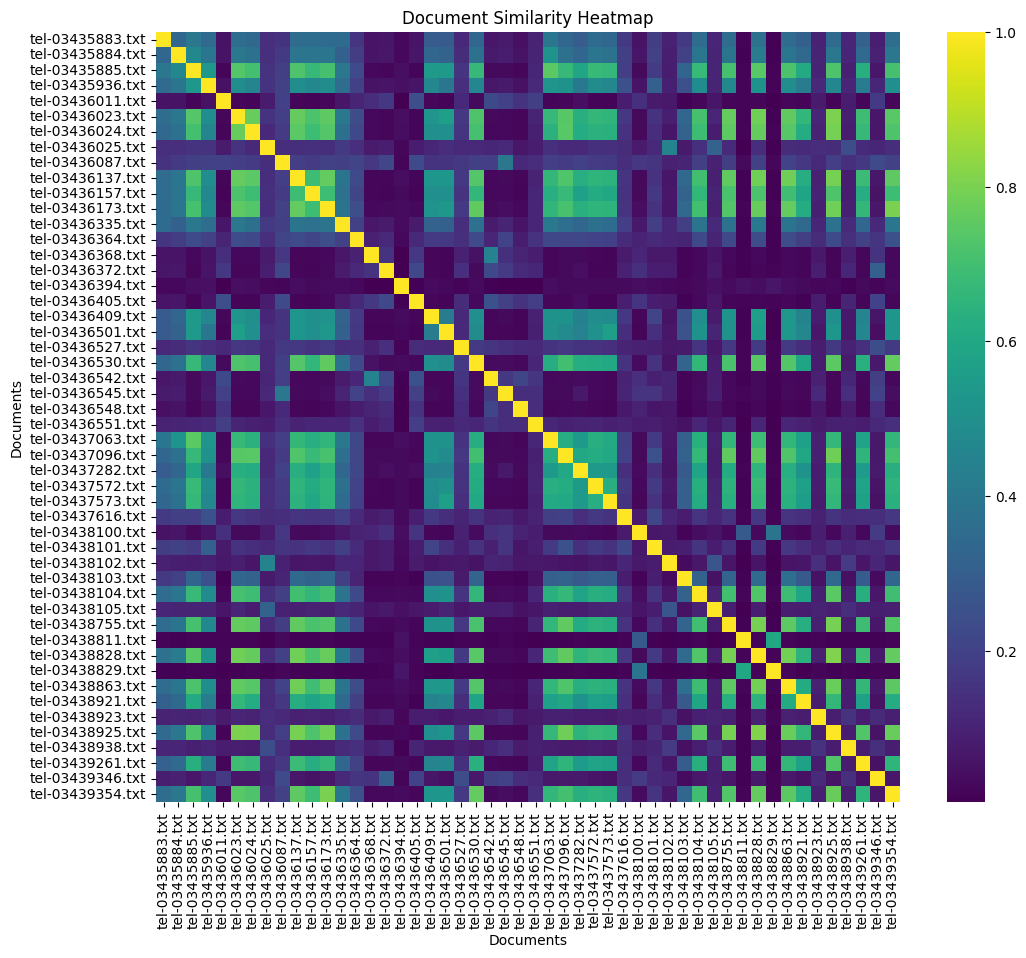

In [45]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot the heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(similarity_df, annot=False, cmap="viridis", xticklabels=True, yticklabels=True)
plt.title("Document Similarity Heatmap")
plt.xlabel("Documents")
plt.ylabel("Documents")
plt.show()


[nltk_data] Downloading package stopwords to C:\Users\CYTech
[nltk_data]     Student\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Similarity matrix saved as 'theses_similarity.csv'


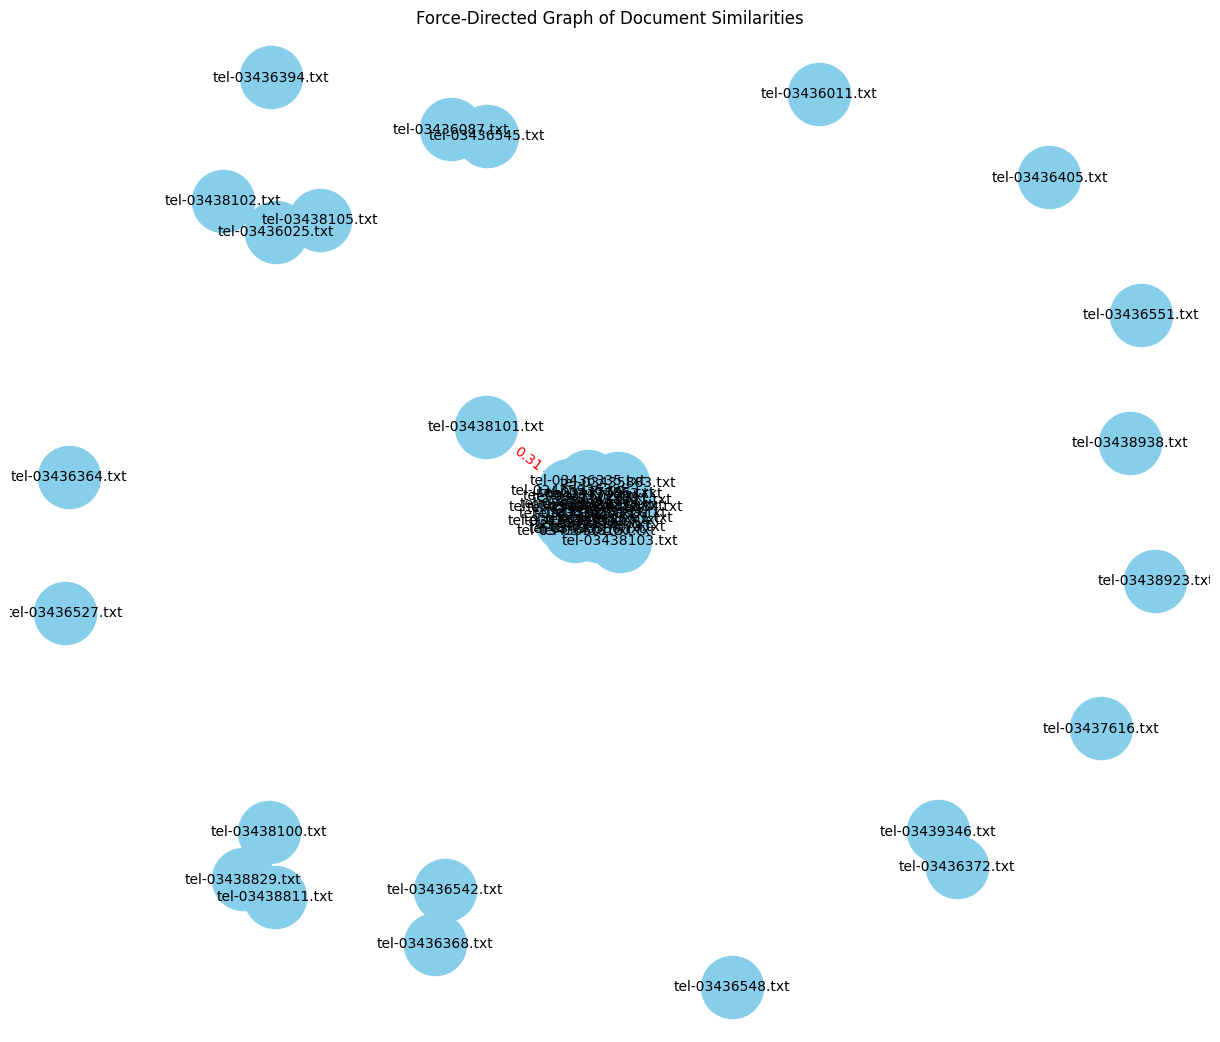

In [46]:
import os
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import regexp_tokenize
from nltk.stem import SnowballStemmer

# Ensure necessary NLTK resources are downloaded
nltk.download('stopwords')

# 1. Load Text Files
def load_text_files(folder_path):
    file_data = []
    file_names = []
    for file_name in os.listdir(folder_path):
        if file_name.endswith('.txt'):
            with open(os.path.join(folder_path, file_name), 'r', encoding='utf-8') as file:
                content = file.read().strip()
                if content:  # Exclude empty files
                    file_data.append(content)
                    file_names.append(file_name)
    return file_data, file_names

# 2. Preprocess Text using NLTK (French Stopwords and Stemming)
def preprocess_text(documents):
    # French stopwords
    stop_words = set(stopwords.words('french'))
    stemmer = SnowballStemmer('french')
    
    processed_docs = []
    for doc in documents:
        # Tokenize the text using a regex tokenizer for French
        tokens = regexp_tokenize(doc, pattern=r'\s|[\.,;?!\(\)"]', gaps=True)
        # Remove stopwords and stem
        filtered_tokens = [stemmer.stem(word) for word in tokens if word.lower() not in stop_words and word.isalpha()]
        processed_docs.append(" ".join(filtered_tokens))
    
    return processed_docs

# 3. TF-IDF Vectorization and Cosine Similarity
def compute_similarity(documents, file_names):
    # Apply TF-IDF Vectorizer
    vectorizer = TfidfVectorizer()
    tfidf_matrix = vectorizer.fit_transform(documents)

    # Compute cosine similarity matrix
    similarity_matrix = cosine_similarity(tfidf_matrix)

    # Convert to DataFrame
    similarity_df = pd.DataFrame(similarity_matrix, index=file_names, columns=file_names)
    return similarity_df

# 4. Create Force-Directed Graph
def create_force_directed_graph(similarity_df, threshold=0.2):
    # Create an empty graph
    G = nx.Graph()

    # Add nodes for each document
    for node in similarity_df.index:
        G.add_node(node)

    # Add edges for document pairs with similarity above the threshold
    for i, row in similarity_df.iterrows():
        for j, similarity in row.items():
            if i != j and similarity >= threshold:  # Avoid self-loops
                G.add_edge(i, j, weight=similarity)

    return G

# 5. Visualize the Graph
def visualize_graph(G):
    # Generate positions for the nodes using a spring layout
    pos = nx.spring_layout(G, seed=42)

    # Draw the graph
    plt.figure(figsize=(12, 10))
    nx.draw(
        G, pos,
        with_labels=True,
        node_color="skyblue",
        edge_color="gray",
        node_size=2000,
        font_size=10
    )

    # Add edge labels showing the weights (cosine similarity)
    edge_labels = nx.get_edge_attributes(G, 'weight')
    nx.draw_networkx_edge_labels(
        G, pos,
        edge_labels={k: f"{v:.2f}" for k, v in edge_labels.items()},
        font_color='red'
    )

    plt.title("Force-Directed Graph of Document Similarities")
    plt.show()

# 6. Main Functionality
folder_path = r"H:\Text Mining\Tel_text\Tel_text"  # Replace with your folder path
documents, file_names = load_text_files(folder_path)

if not documents:
    raise ValueError("No valid documents found. Ensure your folder contains non-empty .txt files.")

# Preprocess the documents using NLTK
processed_documents = preprocess_text(documents)

# Compute similarity matrix
similarity_df = compute_similarity(processed_documents, file_names)

# Save similarity matrix to CSV
output_file = "theses_similarity.csv"
similarity_df.to_csv(output_file)
print(f"Similarity matrix saved as '{output_file}'")

# Create a force-directed graph
threshold = 0.3  # Set a threshold for similarity to filter edges
G = create_force_directed_graph(similarity_df, threshold=threshold)

# Visualize the graph
visualize_graph(G)
